# Homework 2.2: The Quest For A Better Network

In this assignment you will build a monster network to solve CIFAR10 image classification.

This notebook is intended as a sequel to seminar 3, please give it a try if you haven't done so yet.

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +20% for describing your iteration path in a report below.
* +20% for building a network that gets above 20% accuracy
* +10% for beating each of these milestones on __TEST__ dataset:
    * 50% (50% points)
    * 60% (60% points)
    * 65% (70% points)
    * 70% (80% points)
    * 75% (90% points)
    * 80% (full points)
    
## Restrictions
* Please do NOT use pre-trained networks for this assignment until you reach 80%.
 * In other words, base milestones must be beaten without pre-trained nets (and such net must be present in the e-mail). After that, you can use whatever you want.
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

## Tips on what can be done:


 * __Network size__
   * MOAR neurons, 
   * MOAR layers, ([torch.nn docs](http://pytorch.org/docs/master/nn.html))

   * Nonlinearities in the hidden layers
     * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.

   * Ph'nglui mglw'nafh Cthulhu R'lyeh wgah'nagl fhtagn!


### The main rule of prototyping: one change at a time
   * By now you probably have several ideas on what to change. By all means, try them out! But there's a catch: __never test several new things at once__.


### Optimization
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum
   * You should certainly use adaptive optimizers
     * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs
   * __BatchNormalization__ (nn.BatchNorm2d) for the win!
     * Sometimes more batch normalization is better.
   * __Regularize__ to prevent overfitting
     * Add some L2 weight norm to the loss function, theano will do the rest
       * Can be done manually or like [this](https://discuss.pytorch.org/t/simple-l2-regularization/139/2).
     * Dropout (`nn.Dropout`) - to prevent overfitting
       * Don't overdo it. Check if it actually makes your network better
   
### Convolution architectures
   * This task __can__ be solved by a sequence of convolutions and poolings with batch_norm and ReLU seasoning, but you shouldn't necessarily stop there.
   * [Inception family](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/), [ResNet family](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035?gi=9018057983ca), [Densely-connected convolutions (exotic)](https://arxiv.org/abs/1608.06993), [Capsule networks (exotic)](https://arxiv.org/abs/1710.09829)
   * Please do try a few simple architectures before you go for resnet-152.
   * Warning! Training convolutional networks can take long without GPU. That's okay.
     * If you are CPU-only, we still recomment that you try a simple convolutional architecture
     * a perfect option is if you can set it up to run at nighttime and check it up at the morning.
     * Make reasonable layer size estimates. A 128-neuron first convolution is likely an overkill.
     * __To reduce computation__ time by a factor in exchange for some accuracy drop, try using __stride__ parameter. A stride=2 convolution should take roughly 1/4 of the default (stride=1) one.
 
   
### Data augmemntation
   * getting 5x as large dataset for free is a great 
     * Zoom-in+slice = move
     * Rotate+zoom(to remove black stripes)
     * Add Noize (gaussian or bernoulli)
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
     * Other cool libraries: cv2, skimake, PIL/Pillow
   * A more advanced way is to use torchvision transforms:
    ```
    transform_train = transforms.Compose([
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])
    trainset = torchvision.datasets.CIFAR10(root=path_to_cifar_like_in_seminar, train=True, download=True, transform=transform_train)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

    ```
   * Or use this tool from Keras (requires theano/tensorflow): [tutorial](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), [docs](https://keras.io/preprocessing/image/)
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.
   
```

```

```

```

```

```

```

```


   
There is a template for your solution below that you can opt to use or throw away and write it your way.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from cifar import load_cifar10
X_train,y_train,X_val,y_val,X_test,y_test = load_cifar10("cifar_data")
class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print(X_train.shape,y_train.shape)

Dataset not found. Downloading...
(40000, 3, 32, 32) (40000,)


In [3]:
import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [32]:
model = nn.Sequential()

model.add_module('flatten', Flatten())
model.add_module('dense1', nn.Linear(3 * 32 * 32, 100))
model.add_module('dense1_bn', nn.BatchNorm1d(100))
model.add_module('dense1_relu', nn.ReLU())
model.add_module('dense2_logits', nn.Linear(100, 10))

# model.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3))
# model.add_module('conv1_bn', nn.BatchNorm2d(32))
# model.add_module('conv1_relu', nn.ReLU())
# model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3))
# model.add_module('conv2_bn', nn.BatchNorm2d(64))
# model.add_module('pooling2', nn.MaxPool2d(kernel_size=2))
# model.add_module('conv2_relu', nn.ReLU())
# model.add_module('conv3', nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3))
# model.add_module('conv3_bn', nn.BatchNorm2d(64))
# model.add_module('conv3_relu', nn.ReLU())
# model.add_module('conv4', nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3))
# model.add_module('conv4_bn', nn.BatchNorm2d(64))
# model.add_module('conv4_relu', nn.ReLU())
# model.add_module('pooling4', nn.MaxPool2d(kernel_size=2))
# model.add_module('flatten', Flatten())
# model.add_module('dense1', nn.Linear(64 * 5 * 5, 512))
# model.add_module('dense1_bn', nn.BatchNorm1d(512))
# model.add_module('dense1_relu', nn.ReLU())
# model.add_module('dense2', nn.Linear(512 , 512))
# model.add_module('dense2_bn', nn.BatchNorm1d(512))
# model.add_module('dense2_relu', nn.ReLU())
# model.add_module('dense2_logits', nn.Linear(512, 10))

# model.cuda()
_ = _

In [6]:
def compute_loss(X_batch, y_batch):
    X_batch = Variable(torch.FloatTensor(X_batch))
    y_batch = Variable(torch.LongTensor(y_batch))
    logits = model(X_batch)
    return F.cross_entropy(logits, y_batch).mean()

def iterate_minibatches(X, y, batchsize):
    indices = np.random.permutation(np.arange(len(X)))
    for start in range(0, len(indices), batchsize):
        ix = indices[start: start + batchsize]
        yield X[ix], y[ix]

__ Training __

In [64]:
from IPython.display import clear_output
import time

def train_model(model, X_train, y_train, X_val, y_val, training_params=None):
    training_params = training_params or {
                                           'num_epochs': 50,
                                           'batch_size': 128,
                                           'initial_lr': 0.001,
                                           'lr_decay_factor': 2,
                                           'lr_decay_stride': 10
                                         }
    num_epochs = training_params['num_epochs']
    batch_size = training_params['batch_size']
    lr = training_params['initial_lr']
    lr_decay_factor = training_params['lr_decay_factor']
    lr_decay_stride = training_params['lr_decay_stride']

    train_loss_batches = []
    val_accuracy_batches = [] 
    train_loss_epochs = []
    val_accuracy_epochs = []
    time_epochs = []
    
    best_accuracy = 0.
    best_model_state = None
    timer = 0
    timer_limit = 5

    for epoch in range(num_epochs):
        if (epoch + 1) % lr_decay_stride == 0:
            lr /= lr_decay_factor
        opt = torch.optim.Adam(model.parameters(), lr=lr)
        
        start_time = time.time()
        model.train(True)
        for X_batch, y_batch in iterate_minibatches(X_train, y_train, batch_size):
            loss = compute_loss(X_batch, y_batch)
            loss.backward()
            opt.step()
            opt.zero_grad()
            train_loss_batches.append(loss.data.numpy()[0])
        train_loss_epochs.append(np.mean(train_loss_batches[-len(X_train) // batch_size :]))

        model.train(False)
        for X_batch, y_batch in iterate_minibatches(X_val, y_val, batch_size):
            logits = model(Variable(torch.FloatTensor(X_batch)))
            y_pred = logits.max(1)[1].data.numpy()
            val_accuracy_batches.append(np.mean(y_batch == y_pred))
        val_accuracy_epochs.append(np.mean(val_accuracy_batches[-len(X_val) // batch_size :]) * 100)
        
        time_epochs.append(time.time() - start_time)
        
        if val_accuracy_epochs[-1] > best_accuracy:
            best_accuracy = val_accuracy_epochs[-1]
            best_model_state = model.state_dict()
            timer = 0
        else:
            timer += 1
        
        clear_output(True)
        plot_training_log((train_loss_epochs, val_accuracy_epochs))

        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(
            epoch + 1, num_epochs, time_epochs[-1]))
        print("  training loss (in-iteration): \t{:.6f}".format(
            train_loss_epochs[-1]))
        print("  validation accuracy: \t\t\t{:.2f} %".format(
            val_accuracy_epochs[-1]))
        print("  best validation accuracy: \t\t{:.2f} %".format(
            best_accuracy))
        
        if timer > timer_limit:
            model.load_state_dict(best_model_state)
            break
    
    return train_loss_epochs, val_accuracy_epochs, time_epochs

def plot_training_log(log):
    epochs_num = len(log[0])
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    plt.title('Train loss and val accuracy')

    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='b')
    ax1.tick_params('y', colors='b')
    ax1.plot(np.arange(1, epochs_num + 1), log[0], c='b')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Accuracy', color='r')
    ax2.tick_params('y', colors='r')
    ax2.plot(np.arange(1, epochs_num + 1), log[1], c='r')

    plt.show()

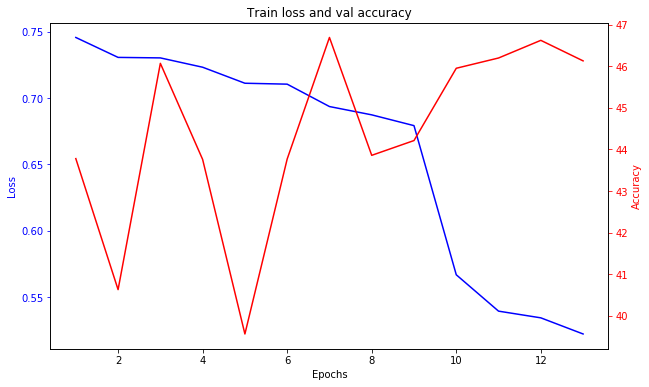

Epoch 13 of 50 took 2.963s
  training loss (in-iteration): 	0.522429
  validation accuracy: 			46.13 %
  best validation accuracy: 		46.70 %


In [65]:
training_params = {
    'num_epochs': 50,
    'batch_size': 128,
    'initial_lr': 0.01,
    'lr_decay_factor': 2,
    'lr_decay_stride': 10
}

log = train_model(model, X_train, y_train, X_val, y_val, training_params)

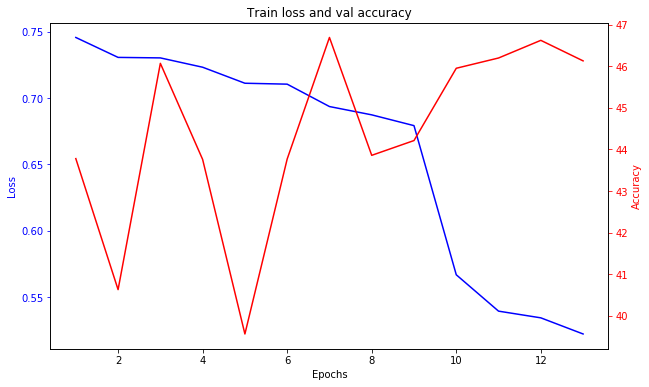

In [66]:
plot_training_log(log)

In [57]:
val_accuracy_batches = []
model.train(False)
for X_batch, y_batch in iterate_minibatches(X_val, y_val, 128):
    logits = model(Variable(torch.FloatTensor(X_batch)))
    y_pred = logits.max(1)[1].data.numpy()
    val_accuracy_batches.append(np.mean(y_batch == y_pred))
print(np.mean(val_accuracy_batches[-len(X_val) // 128 :]) * 100)

50.089003164556964


In [28]:
results = {
    'model_state': model.state_dict(),
    'model_description': str(model),
    'training_params': training_params,
    'training_log': log
}

torch.save(results, 'results_1.dat')

In [22]:
downloaded_results = torch.load('results_1.dat')

In [27]:
downloaded_results['training_log']

([1.5324973,
  1.4348086,
  1.3607683,
  1.3072257,
  1.1850921,
  1.1428478,
  1.1134373,
  1.0855072,
  1.0644342,
  0.987754],
 [45.46083860759494,
  46.24208860759494,
  34.236550632911396,
  46.95411392405063,
  48.54628164556962,
  47.67602848101266,
  47.013449367088604,
  46.89477848101266,
  50.51424050632911,
  50.870253164556964],
 [3.1784772872924805,
  2.962996006011963,
  3.083104372024536,
  3.053917169570923,
  3.1296420097351074,
  3.016979694366455,
  2.9956467151641846,
  2.9976933002471924,
  2.9840610027313232,
  2.973116159439087])

In [35]:
model.train(False) # disable dropout / use averages for batch_norm
test_batch_acc = []
for X_batch, y_batch in iterate_minibatches(X_test, y_test, 500):
    logits = model(Variable(torch.FloatTensor(X_batch)))
    y_pred = logits.max(1)[1].data.numpy()
    test_batch_acc.append(np.mean(y_batch == y_pred))

test_accuracy = np.mean(test_batch_acc)
    
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_accuracy * 100))

if test_accuracy * 100 > 95:
    print("Double-check, than consider applying for NIPS'17. SRSly.")
elif test_accuracy * 100 > 90:
    print("U'r freakin' amazin'!")
elif test_accuracy * 100 > 80:
    print("Achievement unlocked: 110lvl Warlock!")
elif test_accuracy * 100 > 70:
    print("Achievement unlocked: 80lvl Warlock!")
elif test_accuracy * 100 > 60:
    print("Achievement unlocked: 70lvl Warlock!")
elif test_accuracy * 100 > 50:
    print("Achievement unlocked: 60lvl Warlock!")
else:
    print("We need more magic! Follow instructons below")

Final results:
  test accuracy:		50.31 %
Achievement unlocked: 60lvl Warlock!


```

```

```

```

```

```


# Report

All creative approaches are highly welcome, but at the very least it would be great to mention
* the idea;
* brief history of tweaks and improvements;
* what is the final architecture and why?
* what is the training method and, again, why?
* Any regularizations and other techniques applied and their effects;


There is no need to write strict mathematical proofs (unless you want to).
 * "I tried this, this and this, and the second one turned out to be better. And i just didn't like the name of that one" - OK, but can be better
 * "I have analized these and these articles|sources|blog posts, tried that and that to adapt them to my problem and the conclusions are such and such" - the ideal one
 * "I took that code that demo without understanding it, but i'll never confess that and instead i'll make up some pseudoscientific explaination" - __not_ok__

### Hi, my name is `___ ___`, and here's my story

A long ago in a galaxy far far away, when it was still more than an hour before deadline, i got an idea:

##### I gonna build a neural network, that
* brief text on what was
* the original idea
* and why it was so

How could i be so naive?!

##### One day, with no signs of warning,
This thing has finally converged and
* Some explaination about what were the results,
* what worked and what didn't
* most importantly - what next steps were taken, if any
* and what were their respective outcomes

##### Finally, after __  iterations, __ mugs of [tea/coffee]
* what was the final architecture
* as well as training method and tricks

That, having wasted ____ [minutes, hours or days] of my life training, got

* accuracy on training: __
* accuracy on validation: __
* accuracy on test: __


[an optional afterword and mortal curses on assignment authors]